In [13]:
import os
import sys
sys.path.extend(["c:/PycharmProjects/finance/"])
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [10]:
from class_instances import *

In [11]:
df= smartDataReader(name=COMPANIES_LIST,data_source='yahoo',start=start_date,end=end_date,force_reload=False,retry_count=30)
tickers=df['Adj Close'].columns[~df['Adj Close'][:3].isna().any()]

df=df['Adj Close'][tickers].dropna()

portfolio=Portfolio(df)

upon_portf=UponPortolios(portfolio)
df_simmulates=upon_portf.simmulate(100000)

Loading data from disk


In [15]:
class UponPortolios():
    def __init__(self,input_portfolio):
        if isinstance(input_portfolio,Portfolio):
            self.portfolio=input_portfolio
        else:
            self.portfolio=Portfolio(input_portfolio)

    def simmulate(self,n_portfolios=100):
        list_of_prformances_and_weights=[]
        for i in range(n_portfolios):
            weights = np.random.random(len(self.portfolio.mean_returns))
            weights /= np.sum(weights)
            portfolio_attributes = PortfolioPerformance(self.portfolio,weights,tag="simul").__dict__
            list_of_prformances_and_weights.append(portfolio_attributes)

        return pd.DataFrame(list_of_prformances_and_weights)

    def optimize(self):
        portfolio_optimization = PortfolioOptimization(self.portfolio)
        all_tags_weights = portfolio_optimization.all_optims()

        list_of_perf = []
        for tag, weights in all_tags_weights.items():
            list_of_perf.append(PortfolioPerformance(self.portfolio, weights, tag=tag).__dict__)

        return pd.DataFrame(list_of_perf)


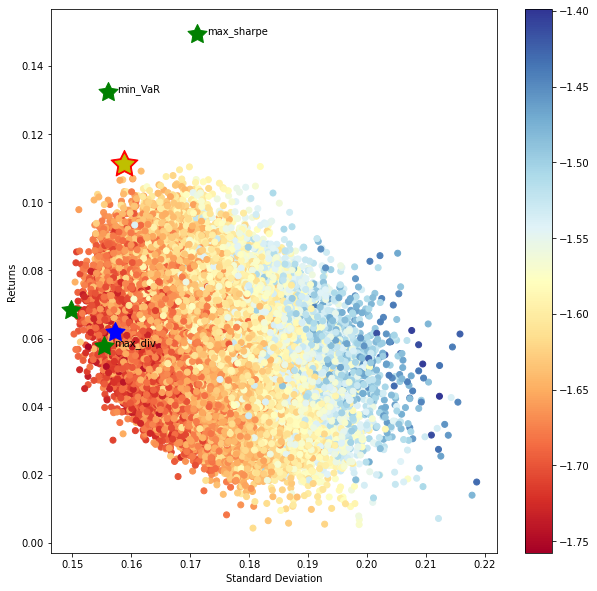

In [18]:
df_optimized=upon_portf.optimize()
max_sharpe_port = df_simmulates.iloc[df_simmulates['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = df_simmulates.iloc[df_simmulates['stdev'].idxmin()]
max_diverse_port = df_simmulates.iloc[df_simmulates['diversif'].idxmin()]
min_VaR_port = df_simmulates.iloc[df_simmulates['VaR'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(10,10))
plt.scatter(df_simmulates.stdev,
            df_simmulates.ret,
            c=df_simmulates.diversif,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
# plt.xlim((0.00,0.2))
# plt.ylim((0.00,0.2))
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=200)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=100)
plt.scatter(max_diverse_port[1],max_diverse_port[0],marker=(5,1,0),color='b',s=100)
plt.scatter(min_VaR_port[1],min_VaR_port[0],marker=(5,1,0),color='y',s=100)

for idx,row in df_optimized.iterrows():
    plt.scatter(row.stdev,row.ret,marker=(5,1,0),color='g',s=100)
    plt.annotate(row.tag,(row.stdev*1.01,row.ret))

plt.show()
